In [6]:
import grafiti as gf
import scanpy as sc
import warnings
import pandas
import seaborn as sns

import squidpy as sq
import networkx as nx
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

model_path = "melanoma_allUT_10_10_lr_001"
annotated_adata_path = "/Users/ceglian/Codebase/sapp2/examples/melanoma_4fov.h5ad"


In [7]:
adata = sc.read("/Users/ceglian/Codebase/sapp2/examples/melanoma_4fov.h5ad")
adata = adata[adata.obs["sample_fov"].isin(['1_1_3', '3_1_5', '4_1_1', '6_1_3'])].copy()
adata.obsm['spatial'] = adata.obs[["x0","y0"]].to_numpy()
sq.gr.spatial_neighbors(adata,radius=10,coord_type='generic',delaunay=True,library_key='sample_fov')

In [8]:
gae = gf.ml.GAE(adata,layers=[100,100], lr=0.1, fov_key="sample_fov",distance_scale=100)
# if not retrain:
#     gae.load(model_path)

Generating PyTorch Geometric Dataset...
Building batches...


100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

Setting up Model...
Ready to train!


In [9]:
gae.train(200, update_interval=1, batch_size=5, threshold=1e-3)

Epoch 0 Loss: 31472580608.0
Epoch 1 Loss: 22780577792.0
Epoch 2 Loss: 16613529600.0
Epoch 3 Loss: 12101134336.0
Epoch 4 Loss: 8646413312.0
Epoch 5 Loss: 6157245952.0
Epoch 6 Loss: 4316511744.0
Epoch 7 Loss: 2994859264.0
Epoch 8 Loss: 2002588800.0
Epoch 9 Loss: 1177426944.0
Epoch 10 Loss: 582772096.0
Epoch 11 Loss: 305188640.0
Epoch 12 Loss: 162623040.0
Epoch 13 Loss: 92535144.0
Epoch 14 Loss: 52730988.0
Epoch 15 Loss: 30563884.0
Epoch 16 Loss: 16412833.0
Epoch 17 Loss: 7518619.5
Epoch 18 Loss: 2774257.0
Epoch 19 Loss: 1071150.625
Epoch 20 Loss: 724089.1875
Epoch 21 Loss: 570998.25
Epoch 22 Loss: 465740.40625
Epoch 23 Loss: 402294.03125
Epoch 24 Loss: 333909.8125
Epoch 25 Loss: 297131.65625
Epoch 26 Loss: 272166.5625
Epoch 27 Loss: 254393.09375
Epoch 28 Loss: 241122.5
Epoch 29 Loss: 230939.84375
Epoch 30 Loss: 222410.3125
Epoch 31 Loss: 214932.546875
Epoch 32 Loss: 208212.0625
Epoch 33 Loss: 201996.203125
Epoch 34 Loss: 196044.609375
Epoch 35 Loss: 190357.0
Epoch 36 Loss: 184846.078125


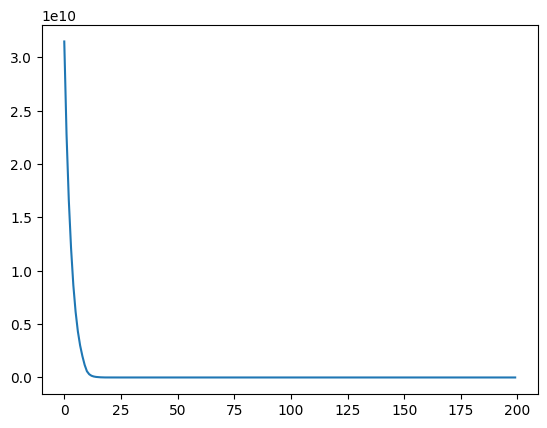

In [10]:
gae.plot()

In [11]:
gae.load_embedding(adata)

In [18]:
gf.tl.find_motifs(adata, resolution=0.1, method="louvain", n_neighbors=20)

In [19]:
gf.tl.umap(adata, metric='cosine', max_iter=100,n_neighbors=10)

In [16]:
adata.obs

,sample_fov,response,ct,x0,y0,grafiti_motif
0,6_1_3,CR,Tumor,1074.724,-810.145,GrafitiMotif9
1,6_1_3,CR,Tumor,723.710,-811.903,GrafitiMotif2
2,6_1_3,CR,Unknown,520.661,-813.954,GrafitiMotif6
3,6_1_3,CR,NK,282.159,-660.422,GrafitiMotif6
4,6_1_3,CR,Tumor,1491.077,-967.779,GrafitiMotif6
...,...,...,...,...,...,...
23184,3_1_5,NR,Tumor,495.463,-917.969,GrafitiMotif0
23185,3_1_5,NR,Tumor,1179.325,-800.476,GrafitiMotif0
23186,3_1_5,NR,MHCIIpos_macro,1018.761,-111.633,GrafitiMotif0
23187,3_1_5,NR,Tumor,890.134,-339.294,GrafitiMotif5


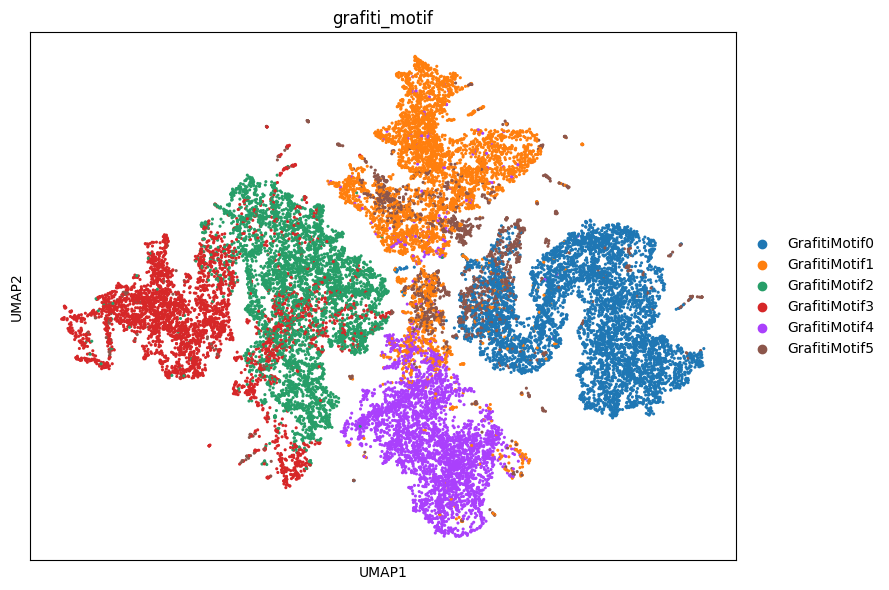

In [20]:
gf.pl.umap(adata, key='grafiti_motif')

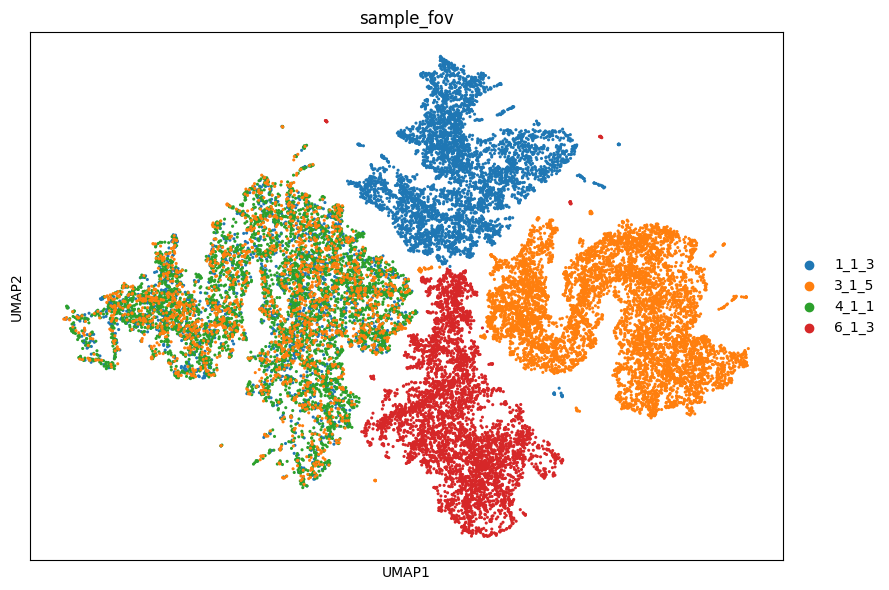

In [22]:
gf.pl.umap(adata, key='sample_fov')